Тема 1: Введение в архитектуру многослойных нейронных сетей

Блок 1: Импорт библиотек и определение данных

In [1]:
import numpy as np

# Данные для XOR: Входы и целевые выходы
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Параметры обучения
learning_rate = 0.1
epochs = 10000

# Инициализация весов и смещений
np.random.seed(1)

Блок 2: Инициализация весов

In [2]:
# Веса для скрытого слоя (2 входа, 2 нейрона в скрытом слое)
weights_hidden = np.random.uniform(size=(2, 2))
bias_hidden = np.random.uniform(size=(1, 2))

# Веса для выходного слоя (2 входа от скрытого слоя, 1 нейрон)
weights_output = np.random.uniform(size=(2, 1))
bias_output = np.random.uniform(size=(1, 1))

Блок 3: Определение функции активации (сигмоида) и ее производной

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

Блок 4: Обучение сети (прямой проход и обратное распространение)

In [4]:
for epoch in range(epochs):
    # Прямой подход
    hidden_layer_input = np.dot(X, weights_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Блок 5: Обучение сети (расчет ошибки и обратное распространение)

    # Ошибка
    error = y - predicted_output

    # Обратное распространение
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Блок 6: Обновление весов

    # Обновление весов выходного слоя
    weights_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    # Обновление весов скрытого слоя
    weights_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Блок 7: Вывод ошибки и конечных предсказаний

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Error: {np.mean(np.abs(error))}')

print("Обучение завершено!")
print("Предсказанные выходы после обучения:")
print(predicted_output)

Epoch 0, Error: 0.49970187910871167


Epoch 1000, Error: 0.4996995090256889
Epoch 2000, Error: 0.49819105799928537
Epoch 3000, Error: 0.48302460749663123
Epoch 4000, Error: 0.41627202394127516
Epoch 5000, Error: 0.3253706342179715
Epoch 6000, Error: 0.16781956812029705
Epoch 7000, Error: 0.10955529478216157
Epoch 8000, Error: 0.08455596607016311
Epoch 9000, Error: 0.07053888527765594
Обучение завершено!
Предсказанные выходы после обучения:
[[0.06368082]
 [0.94085536]
 [0.94108726]
 [0.06402009]]


Тема 2: Обучение искусственной нейронной сети

Блок 1: Импорт библиотек и загрузка данных

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Загрузка dataset'а с рукописными цифрами
digits = load_digits()

Блок 2: Исследование данных

Форма массива данных: (1797, 64)
Форма массива меток: (1797,)


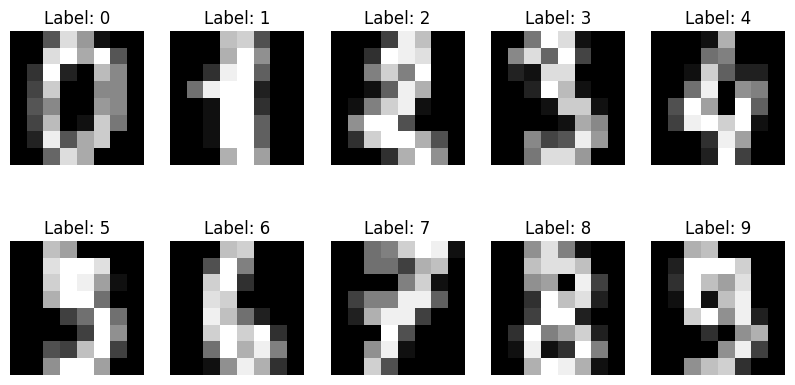

In [6]:
# Выведем информацию о данных
print("Форма массива данных:", digits.data.shape)
print("Форма массива меток:", digits.target.shape)

# Визуализируем первые несколько изображений
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.show()

Блок 3: Подготовка данных

In [7]:
# Преобразуем данные: images to vectors
X = digits.data
y = digits.target

# Нормализация данных (приведение значения пикселей к диапазону [0, 1])
X = X / 16.0  # Максимальное значение пикселя в наборе

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Блок 4: Создание и обучение модели

In [8]:
# Создаем модель MLP (многослойный персептрон)
mlp = MLPClassifier(hidden_layer_sizes=(50, ),max_iter=1000,alpha=1e-4,
solver='sgd',verbose=10,random_state=1,learning_rate_init=.1
)

# Обучение модели
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.12988897
Iteration 2, loss = 1.31000597
Iteration 3, loss = 0.58297747
Iteration 4, loss = 0.30843112
Iteration 5, loss = 0.22413685
Iteration 6, loss = 0.17955830
Iteration 7, loss = 0.15381553
Iteration 8, loss = 0.13532633
Iteration 9, loss = 0.12339217
Iteration 10, loss = 0.11378225
Iteration 11, loss = 0.11254621
Iteration 12, loss = 0.10095874
Iteration 13, loss = 0.09503472
Iteration 14, loss = 0.09118715
Iteration 15, loss = 0.08245005
Iteration 16, loss = 0.07846218
Iteration 17, loss = 0.07296438
Iteration 18, loss = 0.07296406
Iteration 19, loss = 0.06873008
Iteration 20, loss = 0.06342327
Iteration 21, loss = 0.06140283
Iteration 22, loss = 0.05976709
Iteration 23, loss = 0.05730759
Iteration 24, loss = 0.05412256
Iteration 25, loss = 0.05492722
Iteration 26, loss = 0.05313439
Iteration 27, loss = 0.04997990
Iteration 28, loss = 0.04697417
Iteration 29, loss = 0.04532186
Iteration 30, loss = 0.04624802
Iteration 31, loss = 0.04216510
Iteration 32, los

,hidden_layer_sizes,"(50,)"
,activation,'relu'
,solver,'sgd'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.1
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,1


Блок 5: Оценка модели

In [9]:
# Предсказание на тестовой выборке
y_pred = mlp.predict(X_test)

# Точность
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели на тестовой выборке: {accuracy:.2f}')

Точность модели на тестовой выборке: 0.98


Блок 6: Визуализация некоторых предсказаний

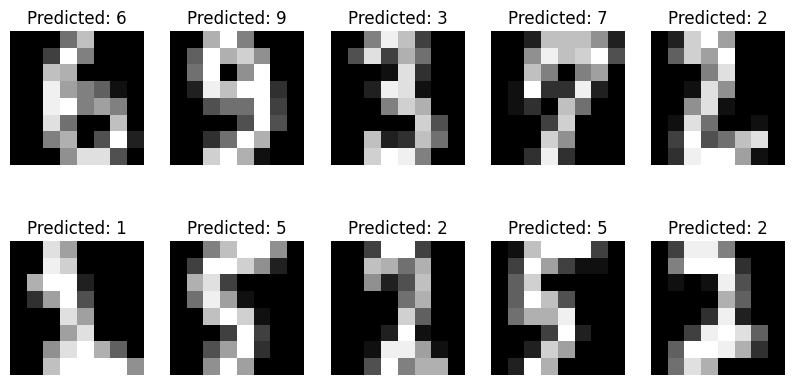

In [10]:
# Визуализация несколько тестовых изображений с предсказанными метками
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Predicted: {y_pred[i]}')
    ax.axis('off')
plt.show()